## Reading input data

In [1]:
from processing import ReadInputData

input_data = ReadInputData("data/spiral/")
kappa, rho_c, T_0, parameters = input_data.load_input_data()
dx, dy, dt = parameters.values()

num_cells_y = T_0.shape[0]
num_cells_x = T_0.shape[1]

## Solving one time step (loop approach)

In [2]:
from solver import conduction_solving_step

T_one_step_loop = conduction_solving_step(kappa, rho_c, T_0, num_cells_x, num_cells_y, dx, dy, dt)

## Solving one time step (sparse matrix multiplication)

In [3]:
from solver import loop_building_conduction_sparse_matrix, conduction_solving_step_matrix

A = loop_building_conduction_sparse_matrix(kappa, rho_c, num_cells_x, num_cells_y, dx, dy)
T_one_step_matrix = conduction_solving_step_matrix(A, T_0, dt)

## Transient simulation (comparison of both approaches)
- For both approaches is simulated 1 min of transient simulation.
- Saved is only the end of the simulation.

In [2]:
from solver import transient_conduction

In [5]:
%%timeit
T_history_loop = transient_conduction(kappa, rho_c, T_0, num_cells_x, num_cells_y, dx, dy, dt, "element_wise", 60, 60)

15.5 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
T_history_matrix = transient_conduction(kappa, rho_c, T_0, num_cells_x, num_cells_y, dx, dy, dt, "matrix_multiplication", 60, 60)

111 ms ± 864 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Printing the simulation results within the given time.

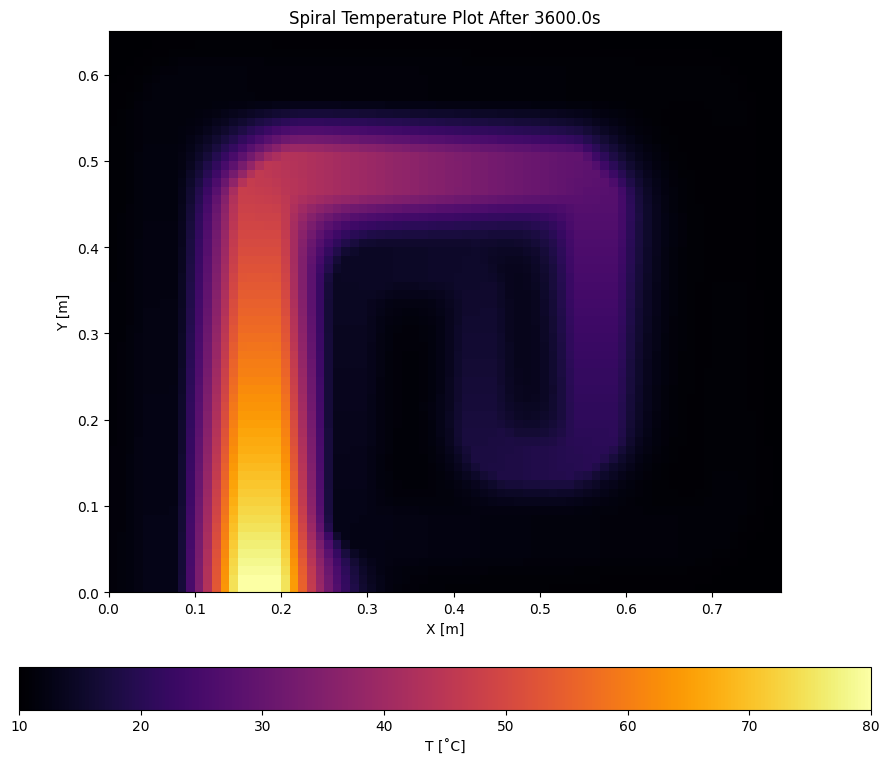

In [28]:
import importlib
import processing
import numpy as np
import solver
importlib.reload(processing)
importlib.reload(solver)

from processing import Mesh, ReadInputData
from solver import transient_conduction

input_data = ReadInputData("data/spiral/")
kappa, rho_c, T_0, parameters = input_data.load_input_data()
dx, dy, dt = parameters.values()

num_cells_y = T_0.shape[0]
num_cells_x = T_0.shape[1]

time = 60*60*1

T_history_matrix = transient_conduction(kappa, rho_c, T_0, num_cells_x, num_cells_y, dx, dy, dt, "matrix_multiplication", time, time/dt)
simulation_time, T = T_history_matrix.popitem()

mesh = Mesh(num_cells_x, num_cells_y, dx, dy)
mesh.show_result(T, f"Spiral Temperature Plot After {simulation_time}s", "T [˚C]", np.min(T_0), np.max(T_0))